In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("E:\\sharda\\Technical\\labour.csv")

In [3]:
df

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869
...,...,...,...,...,...,...,...,...,...
15987,22,HighSchool,black,NotHispanic,NotMarried,0,3975.352,6801.435,2757.438
15988,20,HighSchool,black,NotHispanic,Married,0,1445.939,11832.240,6895.072
15989,37,HighSchool,NotBlack,NotHispanic,NotMarried,0,1733.951,1559.371,4221.865
15990,47,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16914.350,11384.660,13671.930


In [20]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

In [22]:
df.columns=['Age', 'Education', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978']

In [4]:
print(df.isnull().sum())

Age              0
Eduacation       0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [12]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [14]:
df.shape

(15992, 9)

In [24]:
# Use one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Education', 'Race', 'Hisp', 'MaritalStatus'], drop_first=True)
df.head()


,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate,Race_black,Hisp_hispanic,MaritalStatus_NotMarried
0,45,1,21516.670,25243.550,25564.670,False,True,False,False,False,False,False
1,21,0,3175.971,5852.565,13496.080,True,False,False,False,False,False,True
2,38,0,23039.020,25130.760,25564.670,False,False,False,False,False,False,False
3,48,1,24994.370,25243.550,25564.670,False,True,False,False,False,False,False
4,18,1,1669.295,10727.610,9860.869,False,True,False,False,False,False,False


In [38]:
mean1=df['Earnings_1974'].mean()
mean2=df['Earnings_1975'].mean()
mean=[mean1,mean2]
print(mean1 , " , ", mean2)

14016.800304192097  ,  13650.803376072598


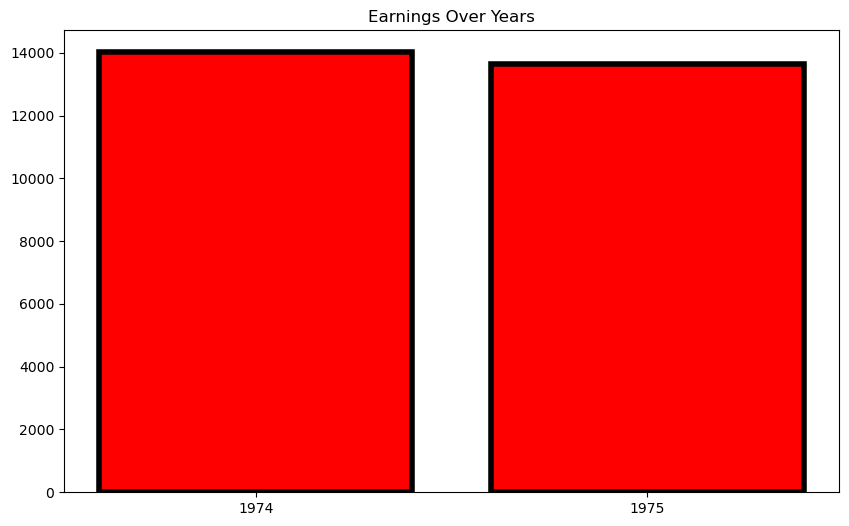

In [46]:
plt.figure(figsize=(10, 6))
plt.bar([1,2],mean,color="red",edgecolor="black",linewidth=4)
plt.title("Earnings Over Years")
plt.xticks([1,2],['1974','1975'])
plt.show()


In [50]:
# Define the features (X) and target (y)
X = df.drop(columns=['Earnings_1978']) 
y = df['Earnings_1978']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 48625764.00113675
R^2 Score: 0.4767136132388896
